In [1]:
!pip install snscrape

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
query="tesla"
tweets=[]
limit=2000

In [5]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets)==limit:
        break
    else:
        tweets.append(tweet.content)
        
#create a dataframe with column called tweets
df=pd.DataFrame(tweets,columns=['tweet'])

In [6]:
print(df)

                                                  tweet
0     #Apple #tesla #AmazonMusic #Amazon #hisse #usd...
1     @Tesla @elonmusk When is it South Africa's tur...
2     Tesla, il mistero delle auto che frenano da so...
3     He is Ultra Wealthy for many reasons, and he m...
4     @Shakima_Lachell Girl I was just saying yester...
...                                                 ...
1995                              @tesla_shonan 肉離れですか？
1996  @Chuckles152 Absolutely not. Total miss here b...
1997  The Dow Is Steady, Tesla Is Jumping — and What...
1998  1er Essai Tesla Model S Performance - 2,5 sec ...
1999  @kendyu1 @_w4mY @tesla_kobe @PF_512_S_Modulo ひ...

[2000 rows x 1 columns]


In [7]:
#function to clean the tweets
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)#remove s@mentions
    text=re.sub(r'#','',text) #removes #
    text=re.sub(r'RT[\s]+','',text) #removes RT
    text=re.sub(r'https?:\/\/\S+','',text) #removes hyperlinks
    return text
#cleaning the text
df['tweet']=df['tweet'].apply(cleanTxt)


In [8]:
df

,tweet
0,Apple tesla AmazonMusic Amazon hisse usdtry do...
1,When is it South Africa's turn ? I would lov...
2,"Tesla, il mistero delle auto che frenano da sole"
3,"He is Ultra Wealthy for many reasons, and he m..."
4,_Lachell Girl I was just saying yesterday I’m ...
...,...
1995,_shonan 肉離れですか？
1996,Absolutely not. Total miss here by Musk and T...
1997,"The Dow Is Steady, Tesla Is Jumping — and What..."
1998,"1er Essai Tesla Model S Performance - 2,5 sec ..."


In [9]:
#function to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [10]:
#create two new columns related to subjectivity and polarity
df['Subjectivity']=df['tweet'].apply(getSubjectivity)
df['Polarity']=df['tweet'].apply(getPolarity)

In [11]:
df

,tweet,Subjectivity,Polarity
0,Apple tesla AmazonMusic Amazon hisse usdtry do...,0.000000,0.000000
1,When is it South Africa's turn ? I would lov...,0.600000,0.625000
2,"Tesla, il mistero delle auto che frenano da sole",0.250000,0.000000
3,"He is Ultra Wealthy for many reasons, and he m...",0.560665,0.211310
4,_Lachell Girl I was just saying yesterday I’m ...,0.650000,-0.225000
...,...,...,...
1995,_shonan 肉離れですか？,0.000000,0.000000
1996,Absolutely not. Total miss here by Musk and T...,0.750000,0.000000
1997,"The Dow Is Steady, Tesla Is Jumping — and What...",0.500000,0.166667
1998,"1er Essai Tesla Model S Performance - 2,5 sec ...",0.600000,-0.172070


In [12]:
#function to compute positive,negative,neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [13]:
df

,tweet,Subjectivity,Polarity,Analysis
0,Apple tesla AmazonMusic Amazon hisse usdtry do...,0.000000,0.000000,Neutral
1,When is it South Africa's turn ? I would lov...,0.600000,0.625000,Positive
2,"Tesla, il mistero delle auto che frenano da sole",0.250000,0.000000,Neutral
3,"He is Ultra Wealthy for many reasons, and he m...",0.560665,0.211310,Positive
4,_Lachell Girl I was just saying yesterday I’m ...,0.650000,-0.225000,Negative
...,...,...,...,...
1995,_shonan 肉離れですか？,0.000000,0.000000,Neutral
1996,Absolutely not. Total miss here by Musk and T...,0.750000,0.000000,Neutral
1997,"The Dow Is Steady, Tesla Is Jumping — and What...",0.500000,0.166667,Positive
1998,"1er Essai Tesla Model S Performance - 2,5 sec ...",0.600000,-0.172070,Negative


In [14]:
#Print all the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['tweet'][i])
        print()
        j=j+1

1)  When is it South Africa's turn ? I would love to drive an automatic Tesla here in South Africa!

2)He is Ultra Wealthy for many reasons, and he make many Idiotic Comments for the same reason, the business culture, environment, and systems have changed specially in the last 3 years, Tesla, I am sure has/had done it also to keep u… 

3)_adri    Buy TSLA. Buy a Tesla. Find two more tsla investors and give rides on Uber 24/7. Train the computer!

4) Buy TSLA. Buy a Tesla. Find two more tsla investors and give rides on Uber 24/7. Train the computer!

5)Stunning location for a stunning SolarPV plus BatteryStorage solution!

This  PV system and Tesla Powerwall with backup is set to fully maximise self-consumption while providing peace of mind, restoring power in an outage in fraction of a second! 🔋 

6) Buy TSLA. Buy a Tesla. Find two more tsla investors and give rides on Uber 24/7. Train the computer!

7)_H_E I don’t believe in global warming but I’m still ridin’ in my Tesla and shopping

In [15]:
#print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['tweet'][i])
        print()
        j=j+1

1)_Lachell Girl I was just saying yesterday I’m bout to sell this mf and get a Tesla or something I can’t do this gas shit no more 😭

2)       Or run a secondary power supply off the drive motor.

3) Not surprised.  BTW-he was driving a gas guzzler, not a Tesla, when he was pulled over!  Remember, Pelosi will not be questioned or subpoenaed during the pseudo hearings! Hypocrites

4)   Missing you on OAN. It’s the only news show I watched

5)    Its not true. Elon Musk joined the company 2 years after it was established.                   

6)    You got the wrong guy. A bit of a confusing thread, I realize. I have an EV Hyundai, and I specifically didn't buy a Tesla because I think Musk is a little creepy. 

However, I will say that car fires are far less common in EVs than in ICE autos.

7)The Tesla truck looks really dumb. Hope this helps.

8)_tesla   I just laugh at her insinuation that SpaceX is no good because they "receive" billions of dollars from US government.
In my book it is

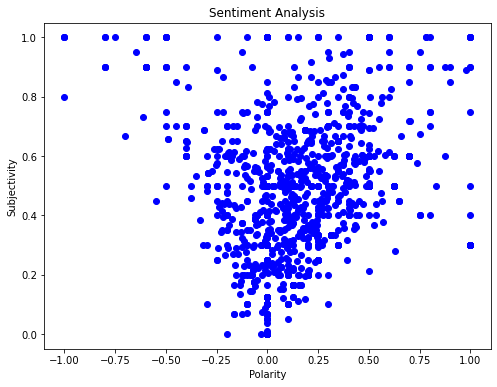

In [16]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [17]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['tweet']
round((ptweets.shape[0]/df.shape[0]*100),11)

36.45

In [18]:
#Get the percentage of NEGATIVE tweets
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['tweet']
round((ptweets.shape[0]/df.shape[0]*100),11)

13.0

In [19]:
#Get the percentage of neutral tweets
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['tweet']
round((ptweets.shape[0]/df.shape[0]*100),11)

50.55

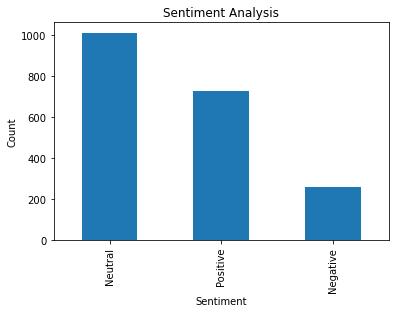

In [20]:
#show the value count
df['Analysis'].value_counts()

#plot and visualize the count
plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()